<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/Unsupervised_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K - means**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/unsupervised_data.csv', delimiter = ',')       # reading train set
df = df.drop(columns = ['ID'])
print(df.shape)

(40000, 6)





`Arranging Data as an array`




In [ ]:
points = df.to_numpy()

print(f'Points = {points}')

Points = [[-21.90459052 -22.65909077  12.80599532 -46.63193454 -34.34708058
  -21.98973763]
 [-28.6623852   68.7570811   31.76182149   3.98225896 -62.87686557
  -61.83856263]
 [-62.55120406  60.90923463   8.11291761  24.1100498  -64.37233589
   70.68194042]
 ...
 [-10.5193655   51.35470206 -45.12963703   1.94184293  13.16236957
  -77.77000929]
 [ 47.12231456 -47.27290614 -47.18462792 -52.90839123 -29.80429118
    2.04282004]
 [-12.18331877  52.25702955 -42.01543172  14.20654525   0.70609201
  -77.29727207]]


`z-score normalization`

In [ ]:
mean = np.mean(points, axis = 0)
std = np.std(points, axis = 0)

points = (points - mean) / std

print(f"Points = {points}")

Points = [[-0.35139799 -0.37542604  0.54841073 -1.14716136 -0.24047117 -0.3996431 ]
 [-0.54362329  1.35051141  1.01882703  0.07881007 -0.84592181 -1.23656397]
 [-1.5075899   1.20234405  0.43194521  0.56634321 -0.87765824  1.54668434]
 ...
 [-0.02754555  1.02195447 -0.88934594  0.02938734  0.76776029 -1.57116255]
 [ 1.61207061 -0.84013491 -0.94034352 -1.299189   -0.14406544  0.10509823]
 [-0.07487666  1.03899041 -0.81206242  0.32646161  0.50341686 -1.56123394]]


## **3. Visualising the Data**

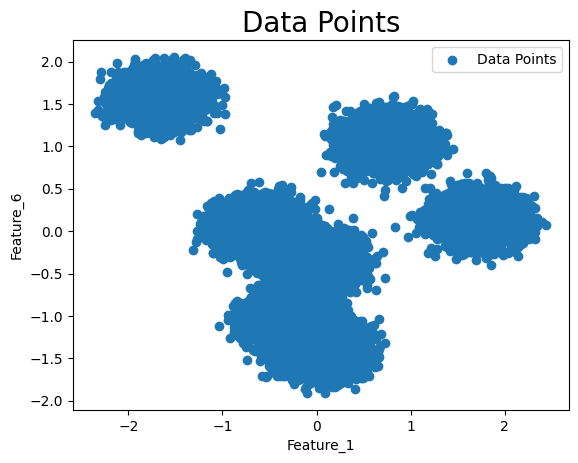

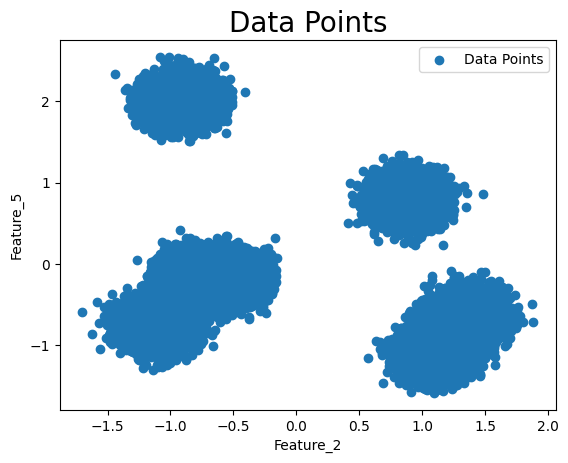

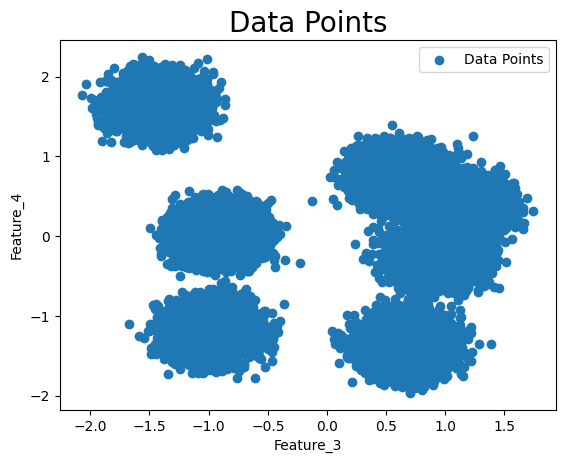

In [ ]:
for i in range(3):
    plt.scatter(points[:, i], points[:, 5-i], label='Data Points')
    plt.title('Data Points', fontdict={'fontsize': 20})
    plt.xlabel(f'Feature_{i+1}')
    plt.ylabel(f'Feature_{6-i}')
    plt.legend()
    plt.show()

##**4. Model Initialization**

In [ ]:
m = points.shape[0]
n = points.shape[1]

## **Random Initialization**

In [ ]:
def rand_init(x, y):
  rand_centroids = []

  for i in range(y):
    centroid = x[np.random.choice(range(x.shape[0]))]
    rand_centroids.append(centroid)

  return np.array(rand_centroids)

## **Finding Closest Centroid**

In [ ]:
def assign(x, mu, k):
  idx = np.zeros(x.shape[0], dtype = int)

  for i in range(x.shape[0]):
    distance = []

    for j in range(mu.shape[0]):
      l2_ij = np.linalg.norm(x[i] - mu[j])

      distance.append(l2_ij)

    idx[i] = np.argmin(distance)

  return idx

## **Reassigning Centroids**

In [ ]:
def reassign(x, idx, k):
  mu = np.zeros((k, x.shape[1]))

  for i in range(k):
    mu[i] = np.mean(x[idx == i], axis = 0)

  return mu

## **Distortion Function**

In [ ]:
def cost_func(mu, idx):
  J = 0

  for i in range(m):
    J += np.linalg.norm(points[i] - mu[idx[i]]) ** 2

  return J / m

## **5. Running K - means**

In [ ]:
def kmeans(points, initial_centroids, num_iters, k):
  J_history = []
  mu_history = []

  mu_history.append(initial_centroids)

  index = assign(points, initial_centroids, k)

  J_history.append(cost_func(initial_centroids, index))

  for i in range(num_iters):

    centroids = reassign(points, index, k)
    index = assign(points, centroids, k)

    mu_history.append(centroids)
    J_history.append(cost_func(centroids, index))

    print(f'Iteration {i + 1 :02}/{num_iters} : Cost = {J_history[-1] :8.4f}')

  return centroids, index, J_history, mu_history

## **6. Two Clusters**

In [ ]:
K = 2        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids2, fin_index2, J_hist2, mu_hist2 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
Iteration 01/10 : Cost =   3.8720
Iteration 02/10 : Cost =   3.8719
Iteration 03/10 : Cost =   3.8719
Iteration 04/10 : Cost =   3.8719
Iteration 05/10 : Cost =   3.8719
Iteration 06/10 : Cost =   3.8719
Iteration 07/10 : Cost =   3.8719
Iteration 08/10 : Cost =   3.8719
Iteration 09/10 : Cost =   3.8719
Iteration 10/10 : Cost =   3.8719
Estimated Final Cost is =  3.8719


`Learning Curve`

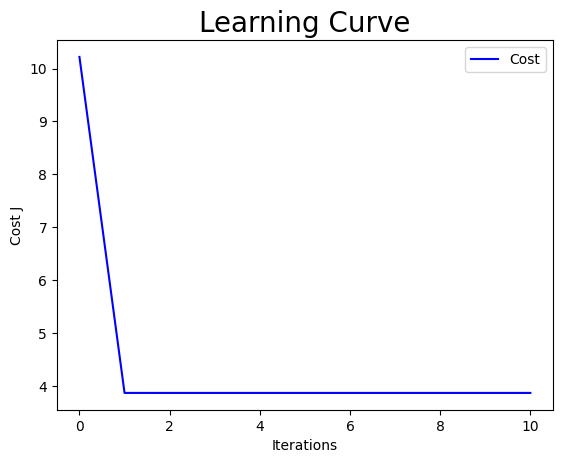

In [ ]:
plt.plot(np.arange(len(J_hist2)), J_hist2, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids2}', '\n'

      f'Assigned Centroids= {fin_index2 + 1}')

Centroids = [[-0.63696916  0.20215262  0.8323191  -0.12245903 -0.66253076  0.05173306]
 [ 0.84936653 -0.26956041 -1.10985591  0.163293    0.88345165 -0.06898345]] 
Assigned Centroids= [1 1 1 ... 2 2 2]


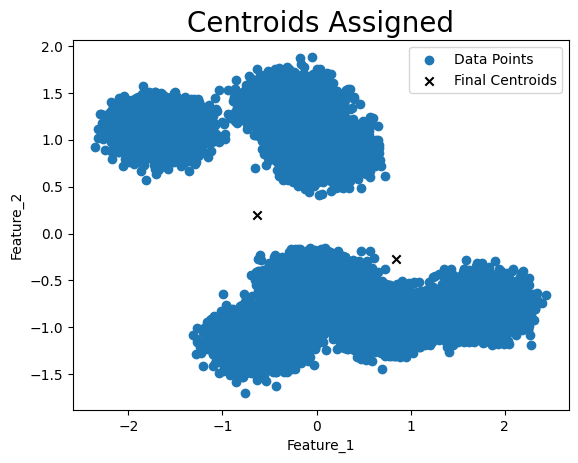

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids2[:, 0], fin_centroids2[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **7. Three Clusters**

In [ ]:
K = 3        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids3, fin_index3, J_hist3, mu_hist3 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist3[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Iteration 01/10 : Cost =   2.6460
Iteration 02/10 : Cost =   2.6339
Iteration 03/10 : Cost =   2.6339
Iteration 04/10 : Cost =   2.6339
Iteration 05/10 : Cost =   2.6339
Iteration 06/10 : Cost =   2.6339
Iteration 07/10 : Cost =   2.6339
Iteration 08/10 : Cost =   2.6339
Iteration 09/10 : Cost =   2.6339
Iteration 10/10 : Cost =   2.6339
Estimated Final Cost is =  2.6339


`Learning Curve`

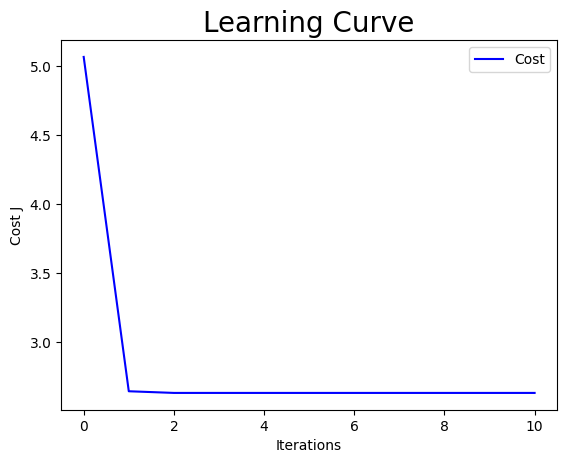

In [ ]:
plt.plot(np.arange(len(J_hist3)), J_hist3, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids3}', '\n'

      f'Assigned Centroids= {fin_index3 + 1}')

Centroids = [[-0.84173274  0.45562993  0.8899823   0.29021842 -0.82040214  0.19291873]
 [ 0.59366467 -0.15235407 -0.413414   -0.84285166  0.15002508 -0.54452871]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]] 
Assigned Centroids= [2 1 1 ... 2 2 2]


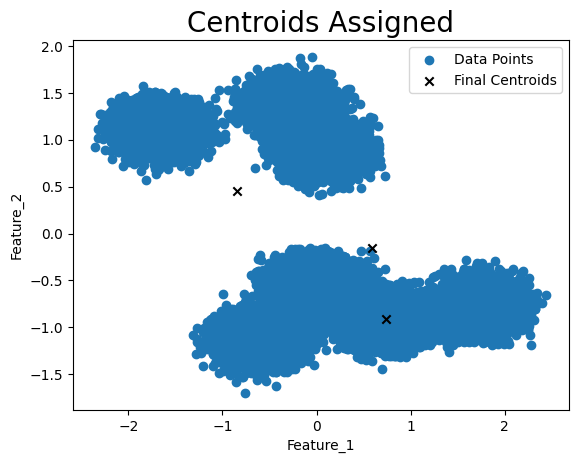

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids3[:, 0], fin_centroids3[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **8. Four Clusters**

In [ ]:
K = 4        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids4, fin_index4, J_hist4, mu_hist4 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist4[-1] : 8.4f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Iteration 01/10 : Cost =   1.9704
Iteration 02/10 : Cost =   1.9009
Iteration 03/10 : Cost =   1.8921
Iteration 04/10 : Cost =   1.8728
Iteration 05/10 : Cost =   1.8053
Iteration 06/10 : Cost =   1.7436
Iteration 07/10 : Cost =   1.7428
Iteration 08/10 : Cost =   1.7428
Iteration 09/10 : Cost =   1.7428
Iteration 10/10 : Cost =   1.7428
Estimated Final Cost is =  1.7428


`Learning Curve`

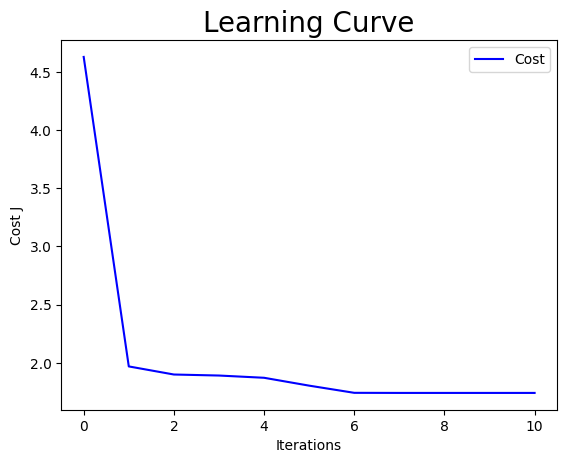

In [ ]:
plt.plot(np.arange(len(J_hist4)), J_hist4, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids4}', '\n'

      f'Assigned Centroids= {fin_index4 + 1}')

Centroids = [[-1.66275132  1.11754327  0.61874522  0.75855076 -1.07625996  1.5807909 ]
 [ 0.90255401  0.0503337  -0.95045998 -0.58455446  0.31997781 -0.63124356]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]
 [-0.29500188 -0.1030132   0.9035187  -0.41616323 -0.52460494 -0.45801235]] 
Assigned Centroids= [4 4 1 ... 2 2 2]


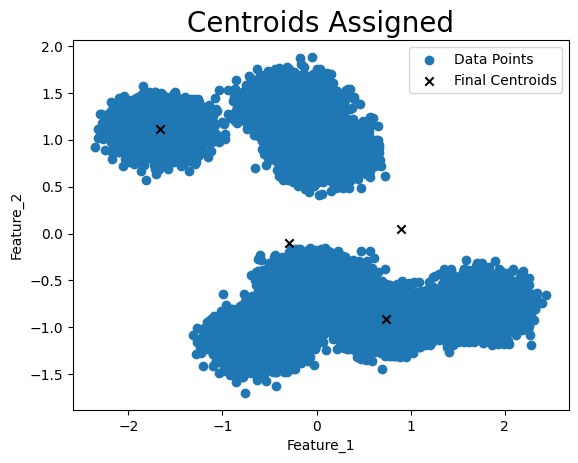

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids4[:, 0], fin_centroids4[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **9. Five Clusters**

In [ ]:
K = 5        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids5, fin_index5, J_hist5, mu_hist5 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist5[-1] : 8.4f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Iteration 01/10 : Cost =   1.5267
Iteration 02/10 : Cost =   1.0176
Iteration 03/10 : Cost =   1.0097
Iteration 04/10 : Cost =   1.0097
Iteration 05/10 : Cost =   1.0097
Iteration 06/10 : Cost =   1.0097
Iteration 07/10 : Cost =   1.0097
Iteration 08/10 : Cost =   1.0097
Iteration 09/10 : Cost =   1.0097
Iteration 10/10 : Cost =   1.0097
Estimated Final Cost is =  1.0097


`Learning Curve`

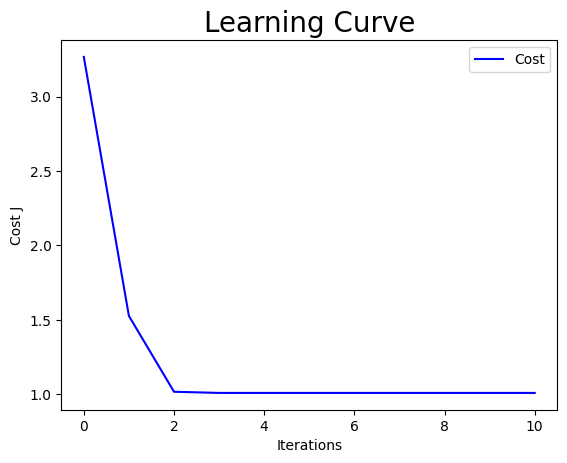

In [ ]:
plt.plot(np.arange(len(J_hist5)), J_hist5, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids5}', '\n'

      f'Assigned Centroids= {fin_index5 + 1}')

Centroids = [[ 0.07916374  0.88244909 -0.91566407  0.03125732  0.78937109 -1.40254636]
 [ 1.72594427 -0.78178168 -0.98525588 -1.20036624 -0.14941547  0.14005924]
 [-0.29500188 -0.1030132   0.9035187  -0.41616323 -0.52460494 -0.45801235]
 [-1.66275132  1.11754327  0.61874522  0.75855076 -1.07625996  1.5807909 ]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]] 
Assigned Centroids= [3 3 4 ... 1 2 1]


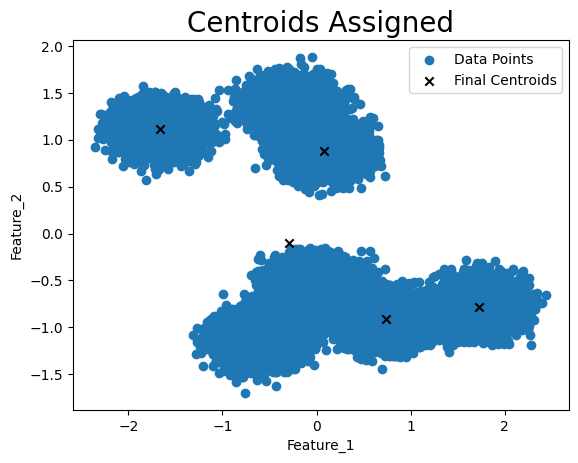

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids5[:, 0], fin_centroids5[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **10. Six Clusters**

In [ ]:
K = 6        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids6, fin_index6, J_hist6, mu_hist6 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist6[-1] : 8.4f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Iteration 01/10 : Cost =   0.6201
Iteration 02/10 : Cost =   0.5703
Iteration 03/10 : Cost =   0.4913
Iteration 04/10 : Cost =   0.3404
Iteration 05/10 : Cost =   0.3347
Iteration 06/10 : Cost =   0.3347
Iteration 07/10 : Cost =   0.3347
Iteration 08/10 : Cost =   0.3347
Iteration 09/10 : Cost =   0.3347
Iteration 10/10 : Cost =   0.3347
Estimated Final Cost is =  0.3347


`Learning Curve`

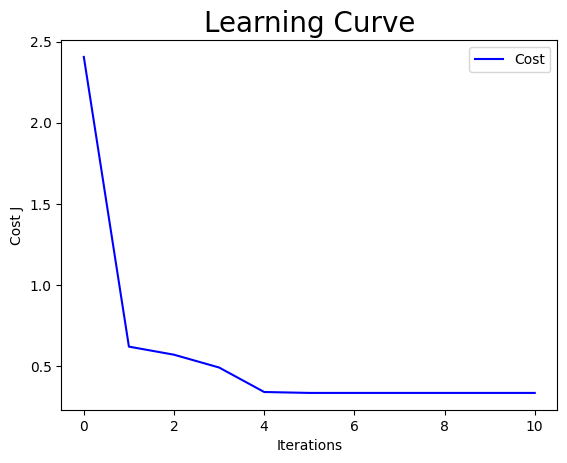

In [ ]:
plt.plot(np.arange(len(J_hist6)), J_hist6, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids6}', '\n'

      f'Assigned Centroids= {fin_index6 + 1}')

Centroids = [[-0.30404375 -0.83608835  0.79700386 -0.79992801 -0.46934107 -0.1606276 ]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]
 [ 1.72594427 -0.78178168 -0.98525588 -1.20036624 -0.14941547  0.14005924]
 [-1.66275132  1.11754327  0.61874522  0.75855076 -1.07625996  1.5807909 ]
 [ 0.07916374  0.88244909 -0.91566407  0.03125732  0.78937109 -1.40254636]
 [-0.27692132  1.36288055  1.11651109  0.35123203 -0.63511334 -1.05267776]] 
Assigned Centroids= [1 6 4 ... 5 3 5]


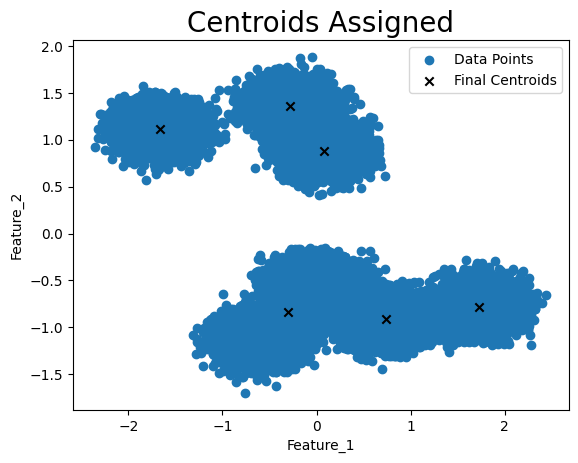

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids6[:, 0], fin_centroids6[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **11. Seven Clusters**

In [ ]:
K = 7        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids7, fin_index7, J_hist7, mu_hist7 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist7[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
Iteration 01/10 : Cost =   1.3440
Iteration 02/10 : Cost =   0.2409
Iteration 03/10 : Cost =   0.1598
Iteration 04/10 : Cost =   0.1597
Iteration 05/10 : Cost =   0.1597
Iteration 06/10 : Cost =   0.1597
Iteration 07/10 : Cost =   0.1597
Iteration 08/10 : Cost =   0.1597
Iteration 09/10 : Cost =   0.1597
Iteration 10/10 : Cost =   0.1597
Estimated Final Cost is =  0.1597


`Learning Curve`

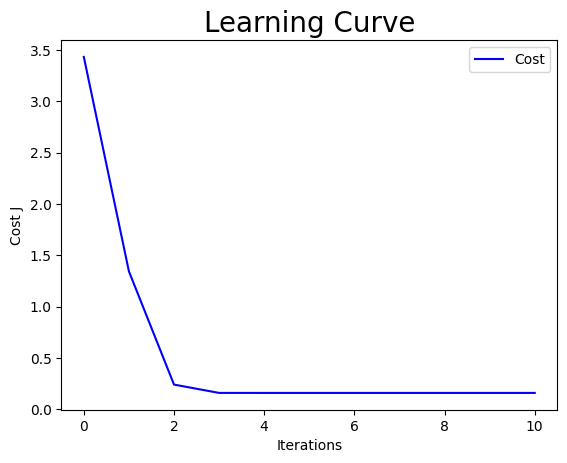

In [ ]:
plt.plot(np.arange(len(J_hist7)), J_hist7, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids7}', '\n'

      f'Assigned Centroids= {fin_index7 + 1}')

Centroids = [[ 0.07916374  0.88244909 -0.91566407  0.03125732  0.78937109 -1.40254636]
 [-1.66275132  1.11754327  0.61874522  0.75855076 -1.07625996  1.5807909 ]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]
 [-0.58467635 -1.11581224  0.93433437 -0.23985487 -0.74968086  0.05046889]
 [-0.02341114 -0.55636445  0.65967335 -1.36000115 -0.18900128 -0.37172409]
 [-0.27692132  1.36288055  1.11651109  0.35123203 -0.63511334 -1.05267776]
 [ 1.72594427 -0.78178168 -0.98525588 -1.20036624 -0.14941547  0.14005924]] 
Assigned Centroids= [5 6 2 ... 1 7 1]


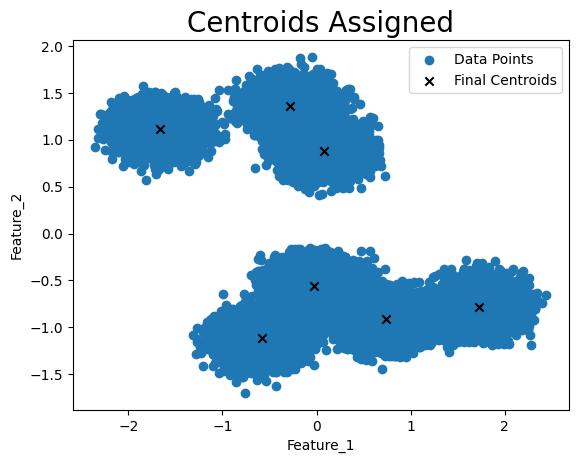

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids7[:, 0], fin_centroids7[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **12. Eight Clusters**

In [ ]:
K = 8        # number of centroids

random_centroids = rand_init(points, K)
num_iters = 10

%time

fin_centroids8, fin_index8, J_hist8, mu_hist8 = kmeans(points, random_centroids, num_iters, K)

print(f"Estimated Final Cost is ={J_hist8[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Iteration 01/10 : Cost =   0.1566
Iteration 02/10 : Cost =   0.1564
Iteration 03/10 : Cost =   0.1563
Iteration 04/10 : Cost =   0.1562
Iteration 05/10 : Cost =   0.1562
Iteration 06/10 : Cost =   0.1562
Iteration 07/10 : Cost =   0.1562
Iteration 08/10 : Cost =   0.1562
Iteration 09/10 : Cost =   0.1561
Iteration 10/10 : Cost =   0.1561
Estimated Final Cost is =  0.1561


`Learning Curve`

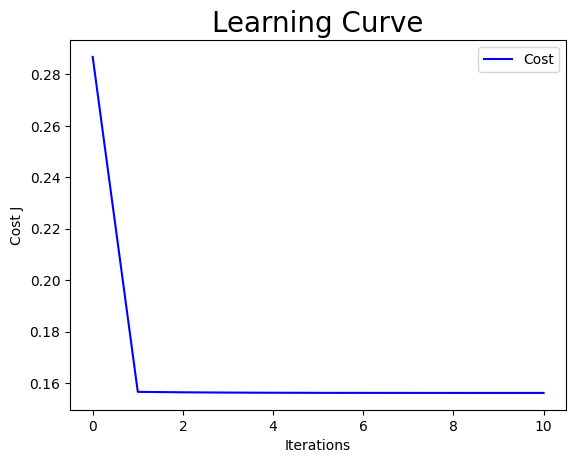

In [ ]:
plt.plot(np.arange(len(J_hist8)), J_hist8, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Final Assignments`

In [ ]:
print(f'Centroids = {fin_centroids8}', '\n'

      f'Assigned Centroids= {fin_index8 + 1}')

Centroids = [[-1.50338131  1.11753724  0.61654168  0.75940824 -1.07476062  1.58043977]
 [-0.27692132  1.36288055  1.11651109  0.35123203 -0.63511334 -1.05267776]
 [ 0.74299158 -0.90934863 -1.42864777  1.65898792  2.01039933  1.05553676]
 [-0.58467635 -1.11581224  0.93433437 -0.23985487 -0.74968086  0.05046889]
 [ 1.72594427 -0.78178168 -0.98525588 -1.20036624 -0.14941547  0.14005924]
 [-1.81875513  1.11754917  0.62090223  0.7577114  -1.07772763  1.58113461]
 [-0.02341114 -0.55636445  0.65967335 -1.36000115 -0.18900128 -0.37172409]
 [ 0.07916374  0.88244909 -0.91566407  0.03125732  0.78937109 -1.40254636]] 
Assigned Centroids= [7 2 1 ... 8 5 8]


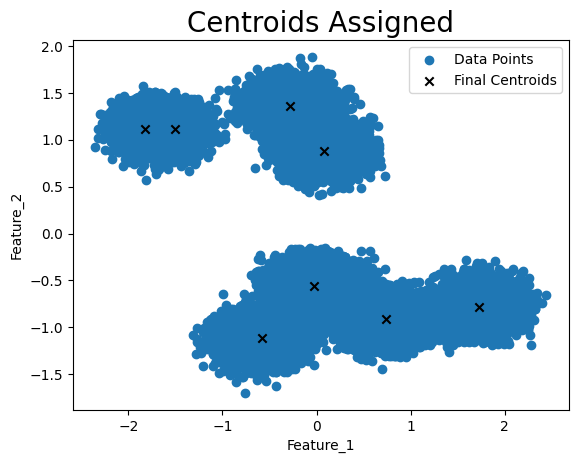

In [ ]:
plt.scatter(points[:, 0], points[:, 1], label = 'Data Points')
plt.scatter(fin_centroids8[:, 0], fin_centroids8[:, 1], c='black', marker='x', label = 'Final Centroids')
plt.title('Centroids Assigned', fontdict = {'fontsize' : 20})
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.legend()
plt.show()

## **13. Elbow Method**

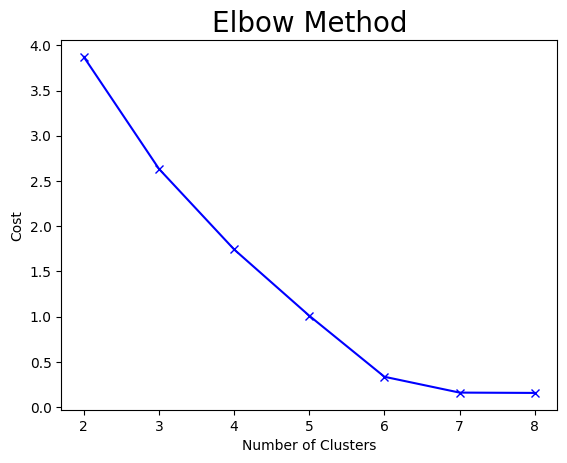

In [ ]:
clusters = [2, 3, 4, 5, 6, 7, 8]
cost = [J_hist2[-1], J_hist3[-1], J_hist4[-1], J_hist5[-1], J_hist6[-1], J_hist7[-1], J_hist8[-1]]

plt.plot(clusters, cost, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method', fontdict = {'fontsize' : 20})

plt.show()

##**14. Six Cluster Plots**

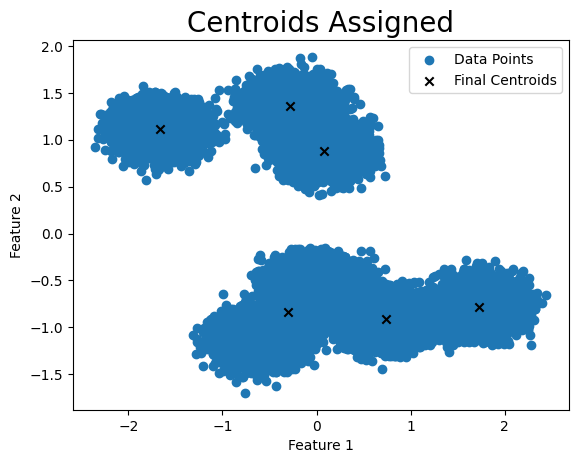

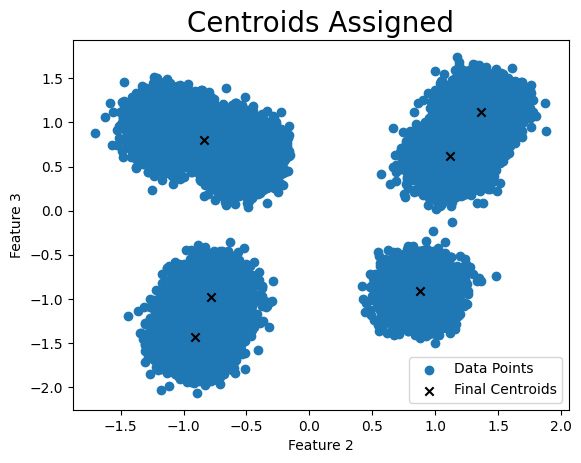

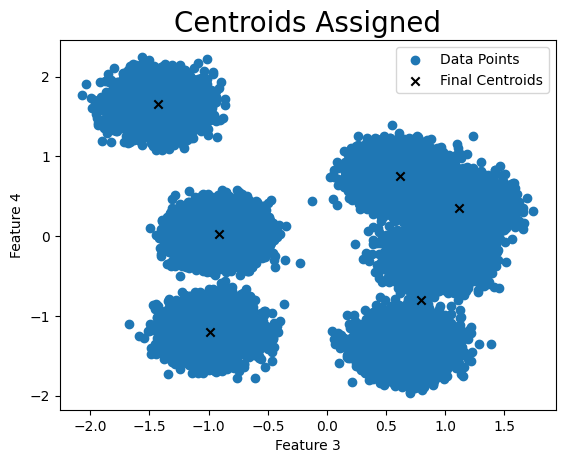

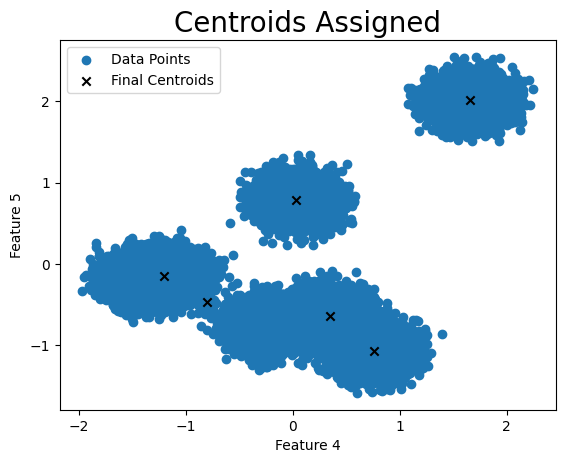

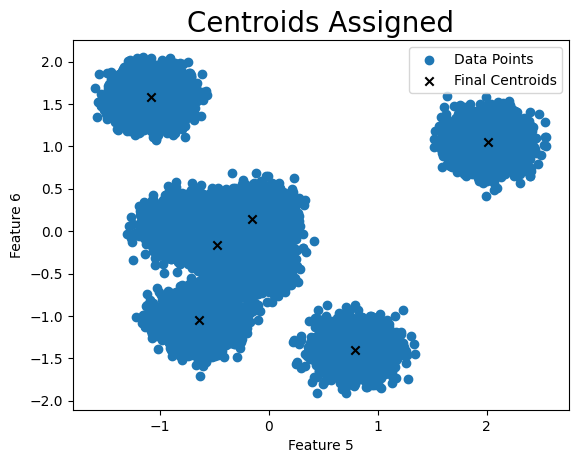

In [ ]:
for i in range(5):
  plt.scatter(points[:, i], points[:, i + 1], label='Data Points')
  plt.scatter(fin_centroids6[:, i], fin_centroids6[:, i + 1], c='black', marker='x', label='Final Centroids')
  plt.title(f'Centroids Assigned', fontdict={'fontsize': 20})
  plt.xlabel(f'Feature {i+1}')
  plt.ylabel(f'Feature {i+2}')

  plt.legend()
  plt.show()

##**15. Seven Cluster Plots**

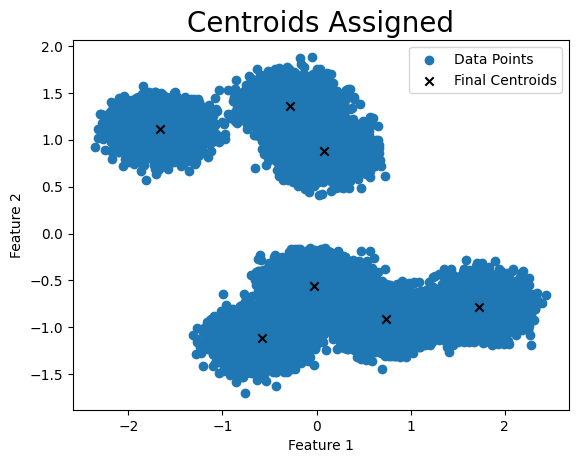

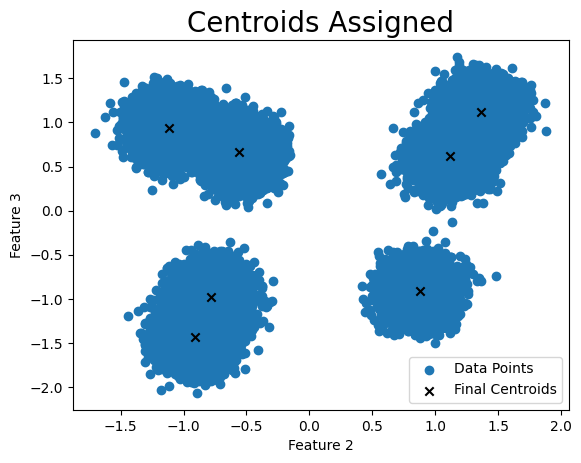

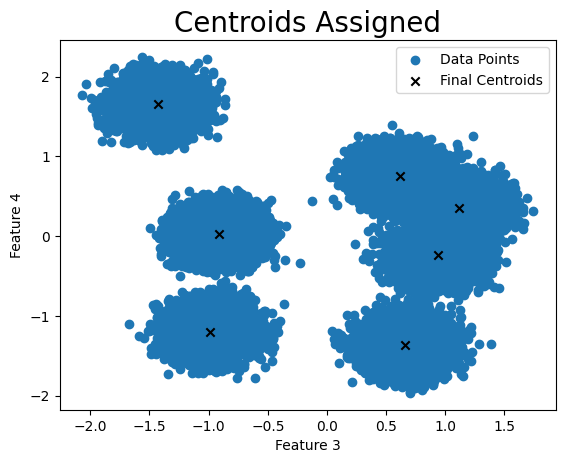

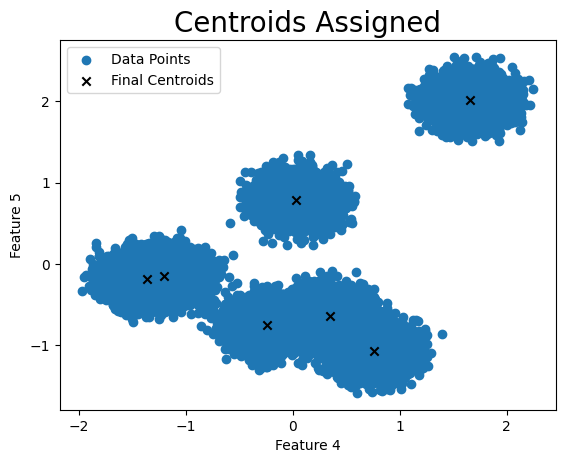

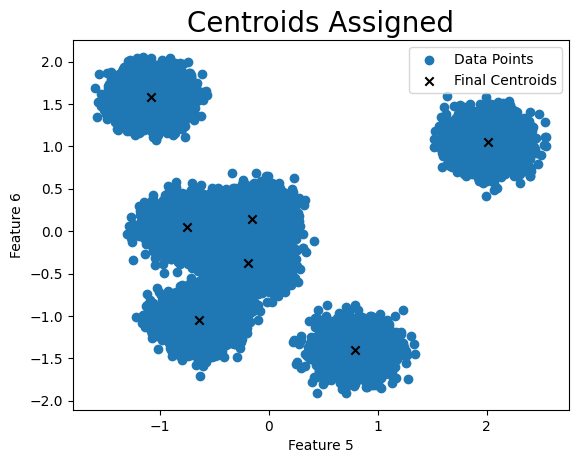

In [ ]:
for i in range(5):
  plt.scatter(points[:, i], points[:, i + 1], label='Data Points')
  plt.scatter(fin_centroids7[:, i], fin_centroids7[:, i + 1], c='black', marker='x', label='Final Centroids')
  plt.title(f'Centroids Assigned', fontdict={'fontsize': 20})
  plt.xlabel(f'Feature {i+1}')
  plt.ylabel(f'Feature {i+2}')

  plt.legend()
  plt.show()

##**16. Final Centroids**

In [ ]:
final_centroids = (fin_centroids7 * std) + mean
print(f'Final Centroids = {final_centroids}')

Final Centroids = [[ -6.76793705  43.96564682 -46.19014872   2.01904503  14.18070435
  -69.74158323]
 [-68.00599579  56.41766798  15.64018363  32.04533304 -73.73076107
   72.30587692]
 [ 16.56932493 -50.93888656 -66.86126471  69.21985401  71.71747275
   47.29663078]
 [-30.10562979 -61.87445853  28.35711779  -9.17381368 -58.34184086
   -0.55828001]
 [-10.37401809 -32.24269223  17.28941752 -55.41901898 -31.92173867
  -20.66041275]
 [-19.28631897  69.41222624  35.69808415  15.22919145 -52.94323962
  -53.08307605]
 [ 51.12561071 -44.18216337 -48.99440995 -48.82849665 -30.05639285
    3.70743983]]


`Saving Centroids`

In [ ]:
# df = pd.DataFrame(final_centroids)
# df.columns = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']
# df.to_csv('/content/drive/MyDrive/unsupervised_centroids.csv', index=False)

##**17. Final Cluster/Indexes**

In [ ]:
final_index = fin_index7
print(f'Final Cluster/Indexes = {final_index}')

Final Cluster/Indexes = [4 5 1 ... 0 6 0]


`Saving Assigned Cluster/Indexes`

In [ ]:
# df = pd.DataFrame(final_index)
# df.columns = ['Final Assigned Cluster/Index']
# df.to_csv('/content/drive/MyDrive/final_assigned_cluster.csv', index=False)